In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn import metrics
import shap
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/mordred2.csv')
y = pd.DataFrame(data['Yield'],columns=['Yield'])
X = data.drop(columns=['Yield', 'Ligand_name', 'Ligand_smiles'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, shuffle=False)


X_train_at = X_train[X_train['Substrate_name'] == 'alpha-tetralone']
X_train_at = X_train_at.drop(columns=['Substrate_name'])
X_train = X_train.drop(columns=['Substrate_name'])
X_test = X_test.drop(columns=['Substrate_name'])

X_train

,L_nAcid,L_nBase,L_nAromAtom,L_nAromBond,L_nAtom,L_nHeavyAtom,L_nBridgehead,L_nHetero,L_nH,L_nC,...,S_SRW10,S_TSRW10,S_MW,S_AMW,S_WPath,S_WPol,S_Zagreb1,S_Zagreb2,S_mZagreb1,S_mZagreb2
0,0.0,0.0,24.0,24.0,49.0,27.0,0.0,2.0,22.0,25.0,...,9.282754,45.217583,182.073165,7.586382,307.0,18.0,68.0,77.0,3.833333,3.222222
1,0.0,0.0,24.0,24.0,49.0,27.0,0.0,2.0,22.0,25.0,...,9.508591,48.143524,210.104465,7.003482,459.0,22.0,80.0,91.0,5.555556,3.555556
2,0.0,0.0,24.0,24.0,49.0,27.0,0.0,2.0,22.0,25.0,...,9.599608,50.610520,242.094294,7.565447,665.0,26.0,88.0,101.0,6.055556,4.222222
3,0.0,0.0,24.0,24.0,49.0,27.0,0.0,2.0,22.0,25.0,...,9.508591,48.143524,218.054321,9.085597,459.0,22.0,80.0,91.0,5.555556,3.555556
4,0.0,0.0,24.0,24.0,49.0,27.0,0.0,2.0,22.0,25.0,...,8.590258,37.289972,120.057515,7.062207,88.0,9.0,40.0,43.0,3.472222,2.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,12.0,12.0,64.0,29.0,0.0,3.0,35.0,26.0,...,9.246190,42.667356,174.029249,10.237015,193.0,15.0,58.0,64.0,5.534722,2.611111
296,0.0,0.0,12.0,12.0,64.0,29.0,0.0,3.0,35.0,26.0,...,9.282754,45.217583,188.120115,6.270671,307.0,18.0,68.0,77.0,3.833333,3.222222
297,0.0,0.0,12.0,12.0,64.0,29.0,0.0,3.0,35.0,26.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
298,0.0,0.0,12.0,12.0,64.0,29.0,0.0,3.0,35.0,26.0,...,9.225721,41.498380,146.073165,6.955865,144.0,14.0,56.0,64.0,3.083333,2.444444


In [3]:
X_train_at

,L_nAcid,L_nBase,L_nAromAtom,L_nAromBond,L_nAtom,L_nHeavyAtom,L_nBridgehead,L_nHetero,L_nH,L_nC,...,S_SRW10,S_TSRW10,S_MW,S_AMW,S_WPath,S_WPol,S_Zagreb1,S_Zagreb2,S_mZagreb1,S_mZagreb2
7,0.0,0.0,24.0,24.0,49.0,27.0,0.0,2.0,22.0,25.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
17,0.0,0.0,24.0,24.0,52.0,28.0,0.0,2.0,24.0,26.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
27,0.0,0.0,24.0,24.0,55.0,29.0,0.0,2.0,26.0,27.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
37,0.0,0.0,24.0,24.0,58.0,30.0,0.0,2.0,28.0,28.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
47,0.0,0.0,30.0,30.0,56.0,32.0,0.0,2.0,24.0,30.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
57,0.0,0.0,36.0,36.0,66.0,38.0,0.0,2.0,28.0,36.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
67,0.0,0.0,34.0,35.0,62.0,36.0,0.0,2.0,26.0,34.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
77,0.0,0.0,36.0,36.0,67.0,39.0,0.0,3.0,28.0,36.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
87,0.0,0.0,36.0,36.0,74.0,42.0,0.0,3.0,32.0,39.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
97,0.0,0.0,6.0,6.0,66.0,26.0,0.0,4.0,40.0,22.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222


In [4]:
X_test

,L_nAcid,L_nBase,L_nAromAtom,L_nAromBond,L_nAtom,L_nHeavyAtom,L_nBridgehead,L_nHetero,L_nH,L_nC,...,S_SRW10,S_TSRW10,S_MW,S_AMW,S_WPath,S_WPol,S_Zagreb1,S_Zagreb2,S_mZagreb1,S_mZagreb2
300,0.0,0.0,36.0,36.0,184.0,84.0,0.0,10.0,100.0,74.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
301,0.0,0.0,36.0,36.0,72.0,44.0,0.0,6.0,28.0,38.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
302,2.0,0.0,10.0,10.0,61.0,25.0,0.0,3.0,36.0,22.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
303,0.0,0.0,36.0,36.0,67.0,40.0,0.0,4.0,27.0,36.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
304,4.0,0.0,44.0,44.0,84.0,48.0,0.0,4.0,36.0,44.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1.0,1.0,18.0,18.0,38.0,24.0,0.0,6.0,14.0,18.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
368,0.0,0.0,24.0,24.0,93.0,43.0,0.0,6.0,50.0,37.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
369,0.0,0.0,24.0,24.0,85.0,39.0,0.0,2.0,46.0,37.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222
370,0.0,0.0,0.0,0.0,58.0,19.0,0.0,1.0,39.0,18.0,...,9.284055,41.607772,146.073165,6.955865,140.0,15.0,56.0,65.0,3.083333,2.472222


In [5]:
param = {"max_leaf_nodes": [3, 5, 7, 15], "max_depth": [4, 6, 8], "l2_regularization": [0, 0.1, 1]}
reg = GridSearchCV(HistGradientBoostingRegressor(random_state=0, max_bins=51, min_samples_leaf=5),
                   param_grid=param, cv=5, n_jobs=16)
reg.fit(X_train,y_train['Yield'])
best = reg.best_estimator_
print(reg.best_params_)
y_pred = best.predict(X_train)

print(metrics.r2_score(y_train, y_pred))

{'l2_regularization': 1, 'max_depth': 4, 'max_leaf_nodes': 15}
0.9895856239926114


Text(0, 0.5, 'prediction')

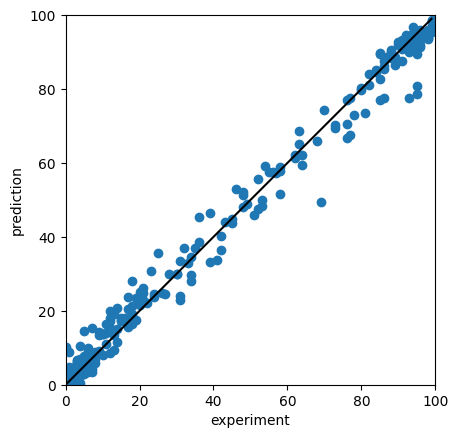

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(0,100),range(0,100), c = "black")
plt.scatter(y_train, y_pred)
plt.xlim(0,100)
plt.ylim(0,100)
ax.set_aspect('equal', adjustable='box')
plt.xlabel("experiment")
plt.ylabel("prediction")

In [7]:
explainer = shap.TreeExplainer(best)
shap_values1 = explainer(X_train)
shap_values2 = explainer(X_train_at)
shap_values3 = explainer(X_test)

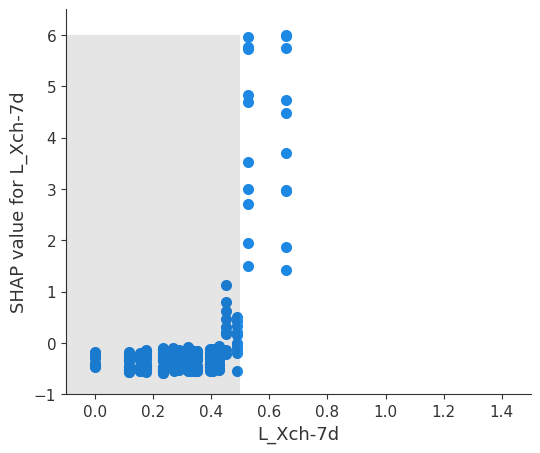

In [8]:
target = 'L_Xch-7d'
shap.plots.scatter(shap_values1[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.xlim(-0.1, 1.5)
plt.ylim(-1, 6.5)
plt.savefig(f'result/SHAP/scatter/scatter_training_{target}.pdf')
plt.show()

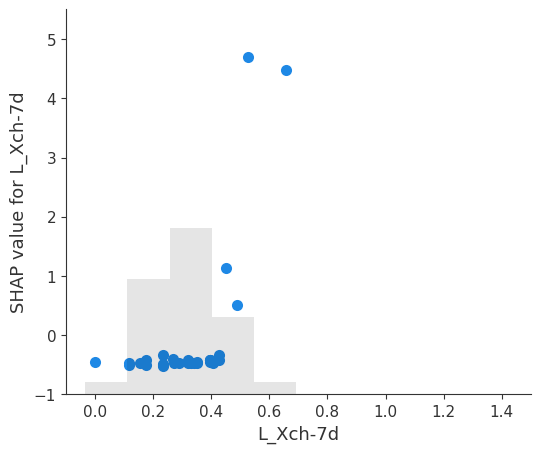

In [9]:
target = 'L_Xch-7d'
shap.plots.scatter(shap_values2[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.xlim(-0.1, 1.5)
plt.ylim(-1, 5.5)
plt.savefig(f'result/SHAP/scatter/scatter_training_at_{target}.pdf')
plt.show()

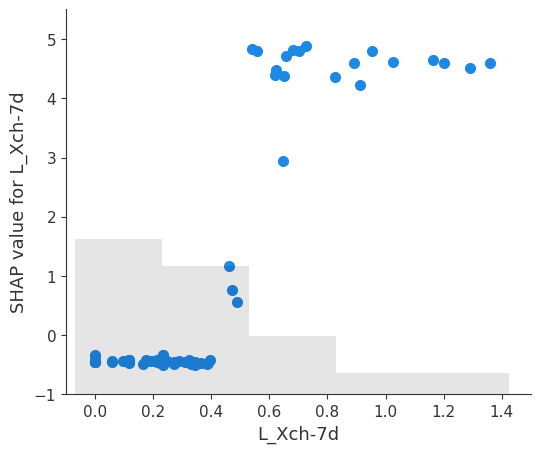

In [10]:
target = 'L_Xch-7d'
shap.plots.scatter(shap_values3[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.xlim(-0.1, 1.5)
plt.ylim(-1, 5.5)
plt.savefig(f'result/SHAP/scatter/scatter_{target}.pdf')
plt.show()

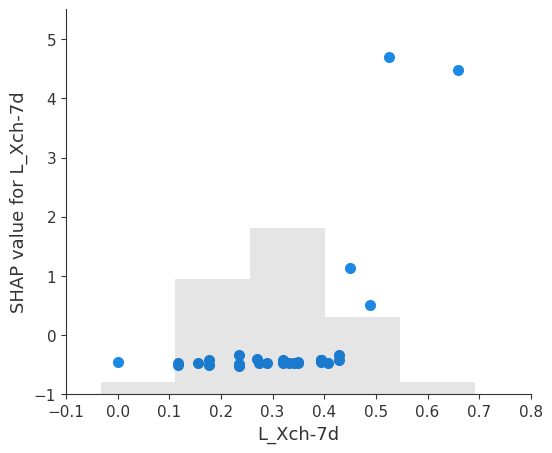

In [11]:
target = 'L_Xch-7d'
shap.plots.scatter(shap_values2[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.xlim(-0.1, 0.8)
plt.ylim(-1, 5.5)
plt.savefig(f'result/SHAP/scatter/scatter_training_at_{target}_2.pdf')
plt.show()

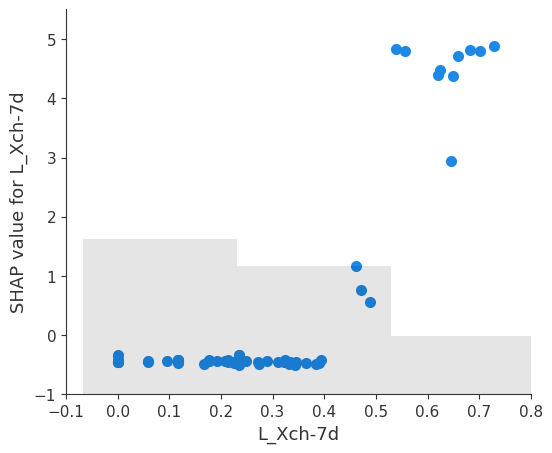

In [12]:
target = 'L_Xch-7d'
shap.plots.scatter(shap_values3[:, target], dot_size=64, show=False)
plt.ylabel(f'SHAP value for {target}')
plt.xlim(-0.1, 0.8)
plt.ylim(-1, 5.5)
plt.savefig(f'result/SHAP/scatter/scatter_{target}_2.pdf')
plt.show()

In [13]:
# Output PDF files were deleted in Github.